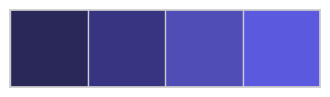

In [32]:
## Impoeting Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date, datetime
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
# Warinige
import warnings
warnings.filterwarnings("ignore")
# set the color palette
palette = sns.color_palette(["#292859",'#373482','#504DB6','#5B59DD'])
sns.palplot(palette)

In [33]:
## Reading Excel file
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign1 (1).xlsx to marketing_campaign1 (1) (3).xlsx


In [34]:
data = pd.read_excel(r"marketing_campaign1 (1).xlsx")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [35]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [37]:
data.shape

(2240, 29)

In [38]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [39]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [40]:
data.duplicated().sum()

0

In [41]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [42]:
data['Income']=data['Income'].fillna(data['Income'].mean())

In [43]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [44]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Feature Engineering**

In [45]:
#Count values of categorical columns
print('Values of Education levels: ', data['Education'].value_counts())
print('Values of Marital Status: ', data['Marital_Status'].value_counts())

Values of Education levels:  Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Values of Marital Status:  Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [46]:
data.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [47]:
# converting columns to DateTime format
data['Year_Birth'] = pd.to_datetime(data['Year_Birth'], format ='%Y')
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [48]:
# Check the skewness before imputation of numeric cols
data['Income'].skew()

6.799964754609881

In [49]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
data['Income'].fillna(data['Income'].median(), inplace = True)

In [50]:
# check the unique values
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [51]:
# check the unique values
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [52]:
# findout the first and last date in dataset
data["Dt_Customer"].dt.year.min() , data["Dt_Customer"].dt.year.max()

(2012, 2014)

In [53]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
data['Age'] = (data["Dt_Customer"].dt.year.max()) - (data['Year_Birth'].dt.year)
data['Years_Customer'] = (data["Dt_Customer"].dt.year.max()) - (data['Dt_Customer'].dt.year)
data['Days_Customer'] = (data["Dt_Customer"].max()) - (data['Dt_Customer'])

# Total amount spent on products
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProducts']

# Total number of purchases made
data['TotalNumPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

# Total number of accepted campaigns
data['Total_acc_cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

# adding columns about the day, month and year cutomer joined
data['Year_Joined'] = data['Dt_Customer'].dt.year
data['Month_Joined'] = data['Dt_Customer'].dt.strftime("%B")
data['Day_Joined'] = data['Dt_Customer'].dt.day_name()

# dividing age into groups
data['Age_Group'] = pd.cut(x = data['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])
# Total children living in the household
data["Children"] = data["Kidhome"] +  data["Teenhome"]

#Deriving living situation by marital status
data["Partner"]=data["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

#Segmenting education levels in three groups
data["Education_Level"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [54]:
# Dropping useless columns
data.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [55]:
print(data.shape)
data.sample(5)

(2240, 40)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
1099,6001,1979-01-01,Graduation,Married,56775.0,0,1,2013-01-02,62,614,35,160,58,35,35,2,5,8,10,5,0,0,0,0,0,0,0,35,1,543 days,937,25,0,2013,January,Wednesday,Adult,1,Yes,Graduate
466,7999,1955-01-01,PhD,Together,75261.0,0,0,2013-04-23,17,1239,17,413,23,34,17,1,5,6,5,2,0,1,1,0,0,0,1,59,1,432 days,1743,17,3,2013,April,Tuesday,Middel Aged,0,Yes,Postgraduate
1524,11110,1973-01-01,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,41,1,442 days,5,0,0,2013,April,Saturday,Adult,1,No,Graduate
1850,4427,1995-01-01,2n Cycle,Single,83257.0,0,0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,1,19,2,649 days,1365,28,3,2012,September,Tuesday,Young adult,0,No,Undergraduate
2138,2948,1954-01-01,Master,Divorced,62637.0,0,1,2014-03-01,76,104,12,48,4,12,5,1,2,2,5,2,0,0,0,0,0,0,0,60,0,120 days,185,10,0,2014,March,Saturday,Middel Aged,1,No,Postgraduate


In [56]:
df1 = data.copy() # make a copy
df1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

In [57]:
num_col = df1.select_dtypes(include = np.number).columns

In [58]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


## EDA After Feature Engineering

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   ID                   2240 non-null   int64          
 1   Year_Birth           2240 non-null   datetime64[ns] 
 2   Education            2240 non-null   object         
 3   Marital_Status       2240 non-null   object         
 4   Income               2240 non-null   float64        
 5   Kidhome              2240 non-null   int64          
 6   Teenhome             2240 non-null   int64          
 7   Dt_Customer          2240 non-null   datetime64[ns] 
 8   Recency              2240 non-null   int64          
 9   MntWines             2240 non-null   int64          
 10  MntFruits            2240 non-null   int64          
 11  MntMeatProducts      2240 non-null   int64          
 12  MntFishProducts      2240 non-null   int64          
 13  MntSweetProducts  

<Axes: xlabel='Education', ylabel='count'>

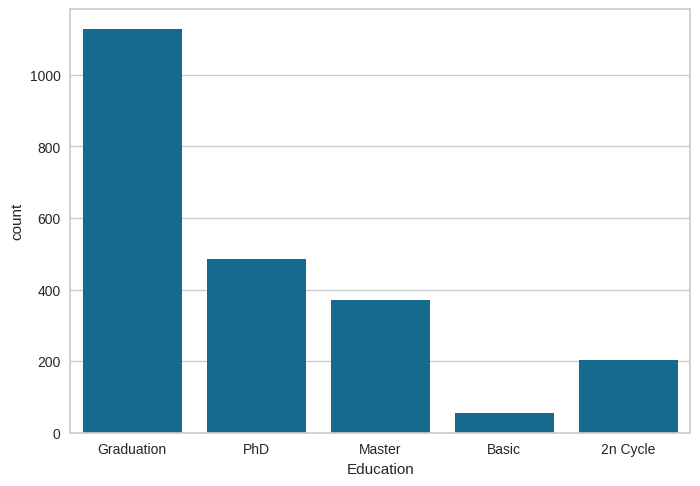

In [60]:
sns.countplot(x='Education',data=data)

Text(0.5, 1.0, 'Age')

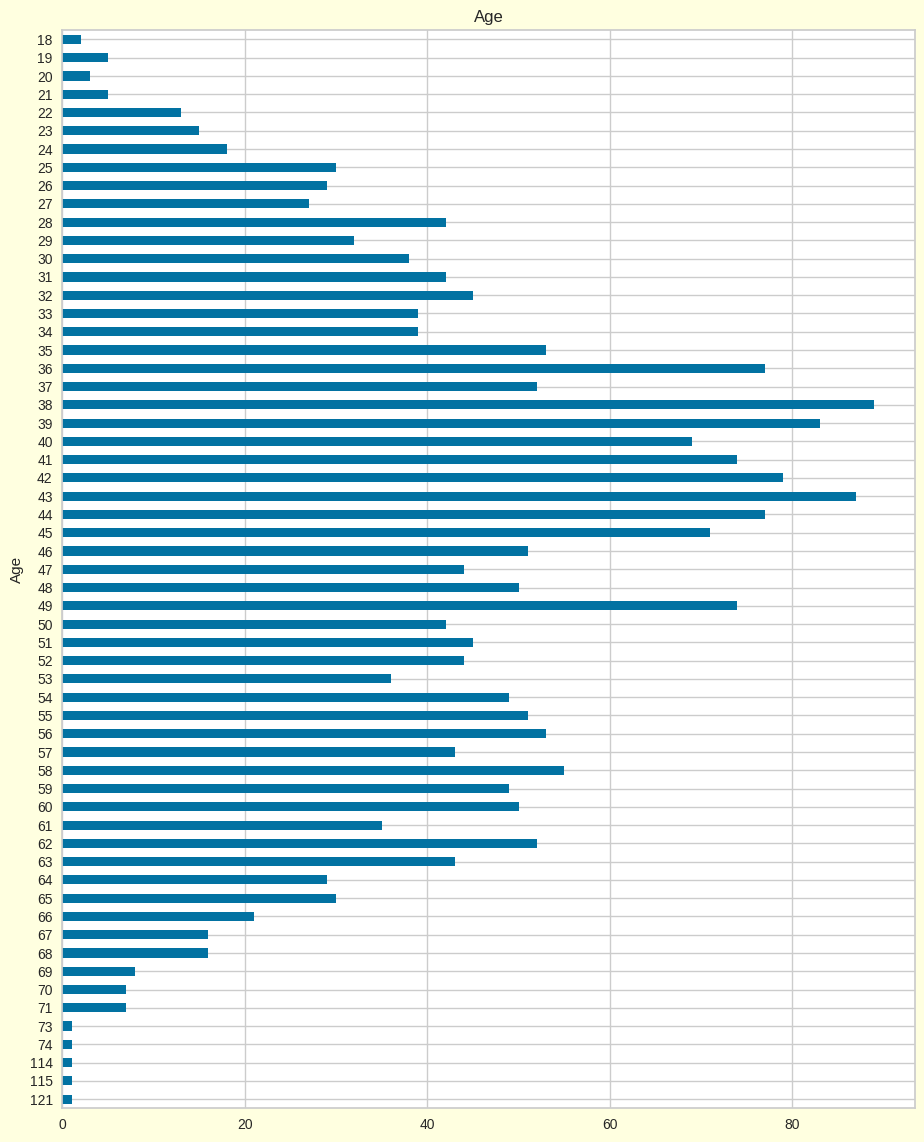

In [61]:
plt.figure(figsize=(11,14),facecolor='lightyellow')
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title("Age")

<Axes: xlabel='Kidhome', ylabel='count'>

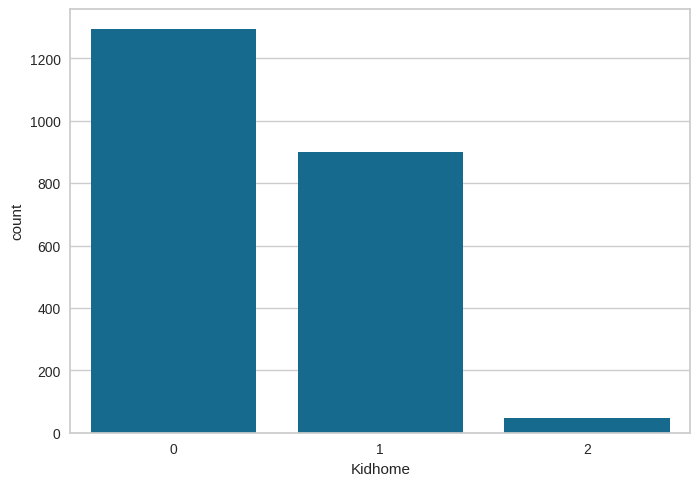

In [62]:
sns.countplot(x='Kidhome',data=data)

<Axes: xlabel='Teenhome', ylabel='count'>

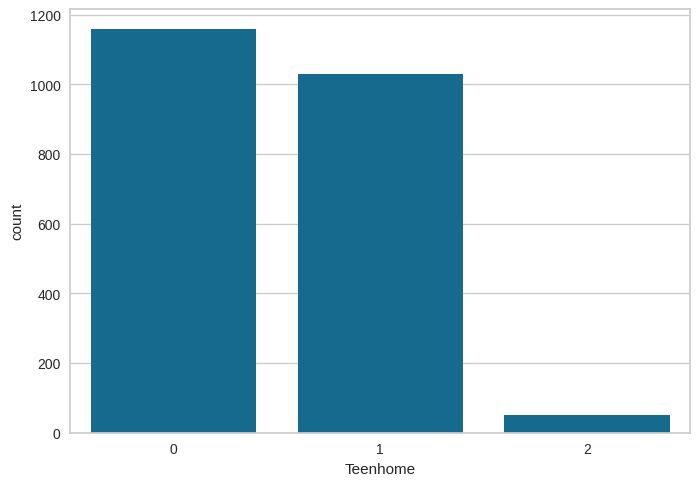

In [63]:
sns.countplot(x='Teenhome',data=data)

<Axes: >

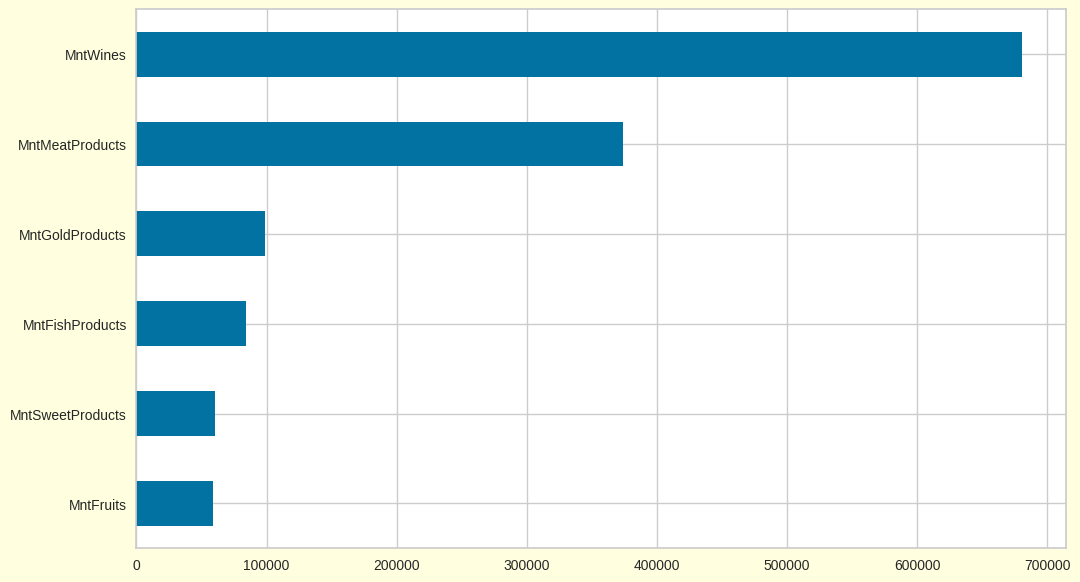

In [64]:
plt.figure(figsize=(12,7),facecolor='lightyellow')
data[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProducts']].sum().sort_values(ascending= True ).plot(kind='barh')

<Axes: >

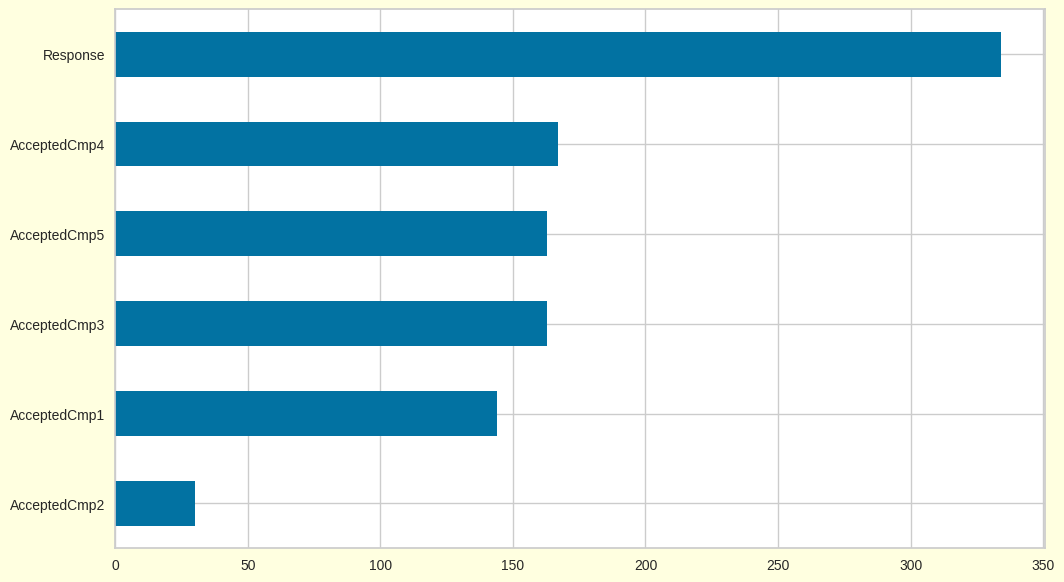

In [65]:
plt.figure(figsize=(12,7),facecolor='lightyellow')
data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum().sort_values(ascending= True ).plot(kind='barh')

<Axes: >

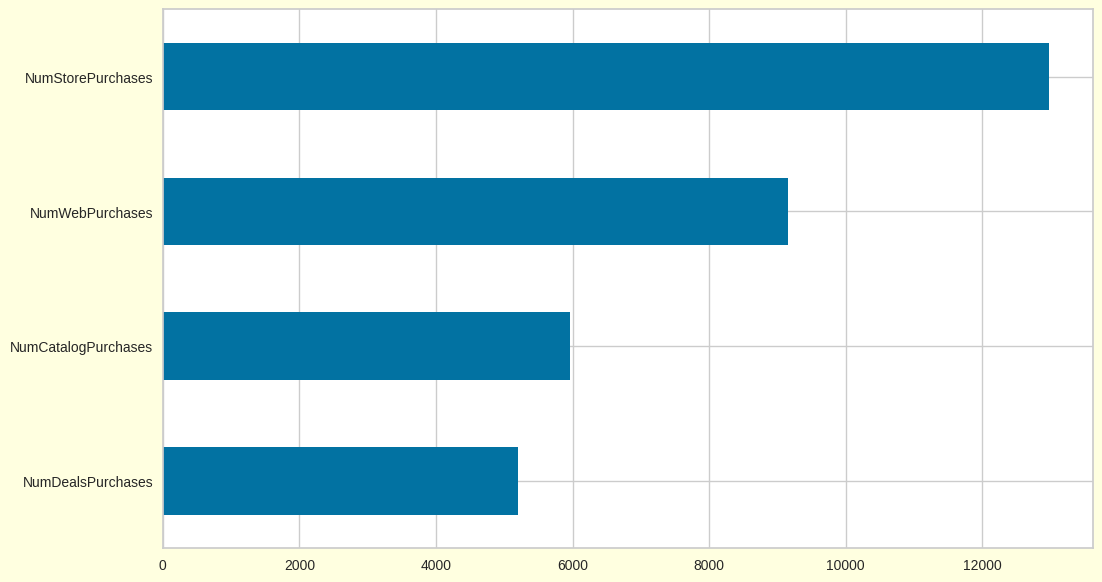

In [66]:
plt.figure(figsize=(12,7),facecolor='lightyellow')
data[[ 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending= True ).plot(kind='barh')

<Axes: xlabel='Education'>

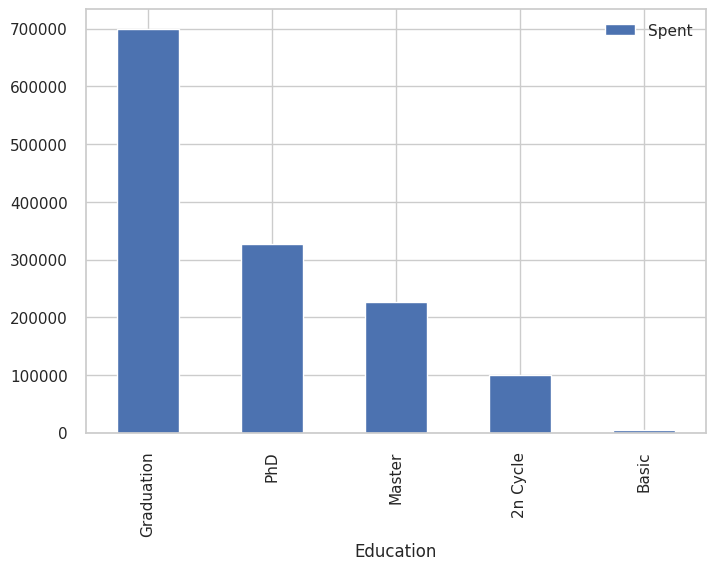

In [67]:
sns.set(style='whitegrid')
data[['Education','Spent']].groupby('Education').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<Axes: xlabel='Marital_Status'>

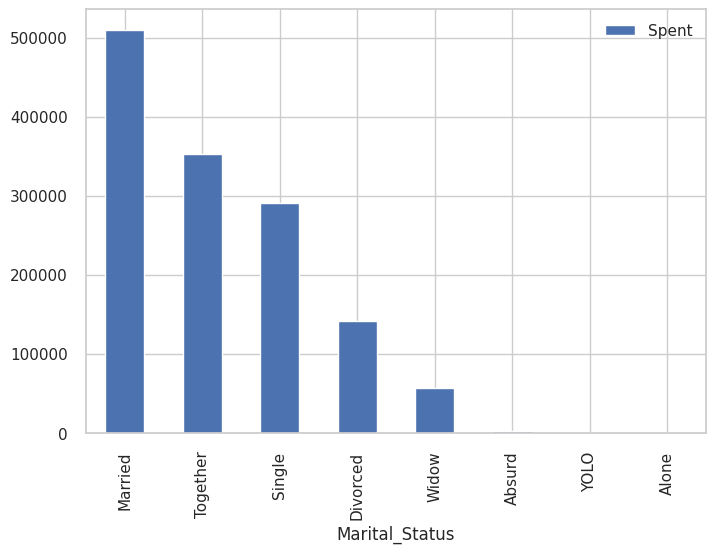

In [68]:
sns.set(style='whitegrid')
data[['Marital_Status','Spent']].groupby('Marital_Status').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<Axes: xlabel='Kidhome'>

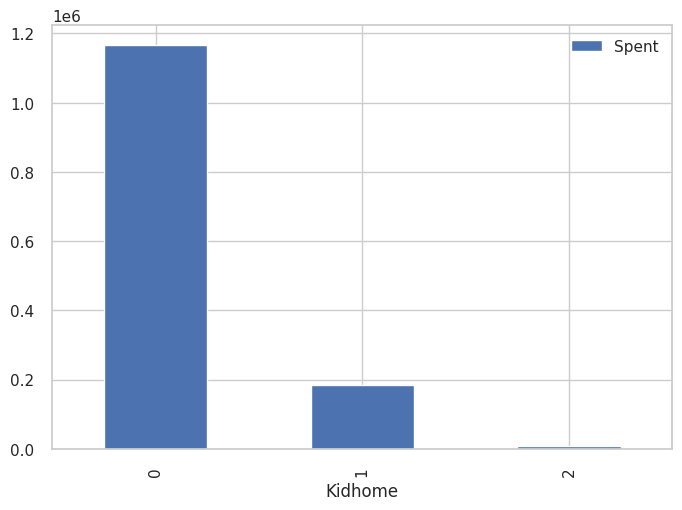

In [69]:
sns.set(style='whitegrid')
data[['Kidhome','Spent']].groupby('Kidhome').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<Axes: xlabel='Teenhome'>

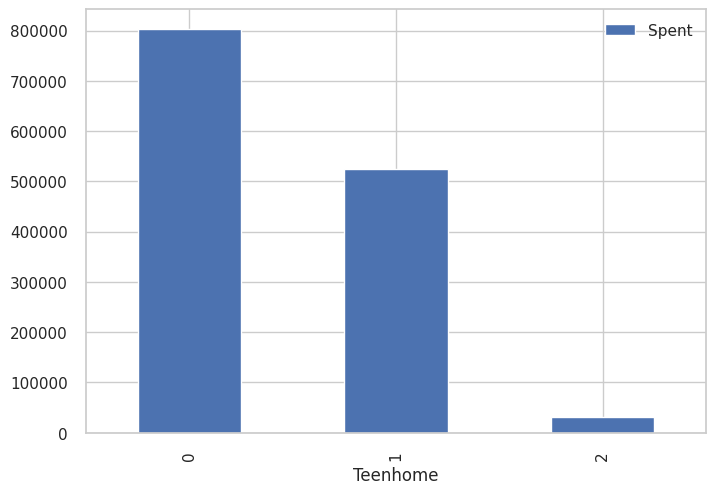

In [70]:
sns.set(style='whitegrid')
data[['Teenhome','Spent']].groupby('Teenhome').sum().sort_values(by='Spent',ascending=False).plot(kind='bar')

<Axes: xlabel='Education'>

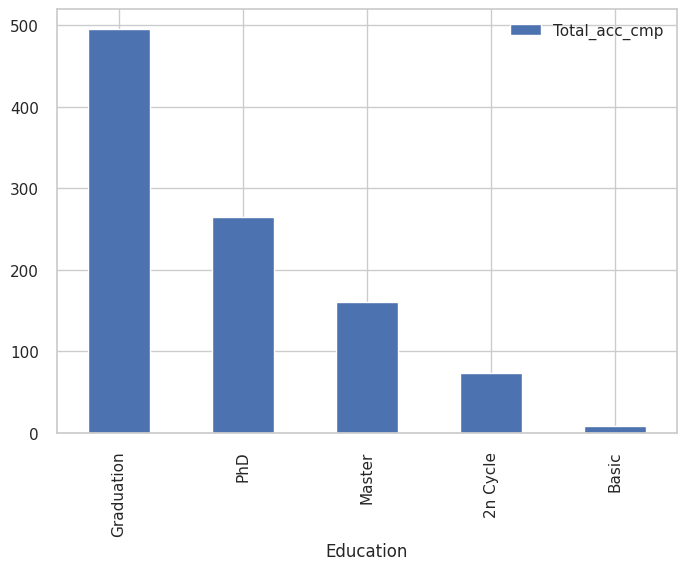

In [71]:
sns.set(style='whitegrid')
data[['Education','Total_acc_cmp']].groupby('Education').sum().sort_values(by='Total_acc_cmp',ascending=False).plot(kind='bar')

<Axes: >

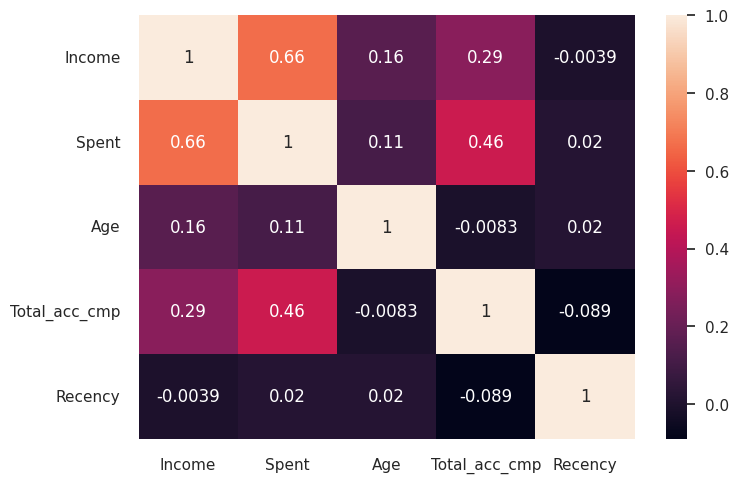

In [72]:
sns.heatmap(data[['Income','Spent','Age','Total_acc_cmp','Recency']].corr(),annot=True)

As there are strong correlation between "Income" & "Spent". So, applying Bivariate Analysis between them.

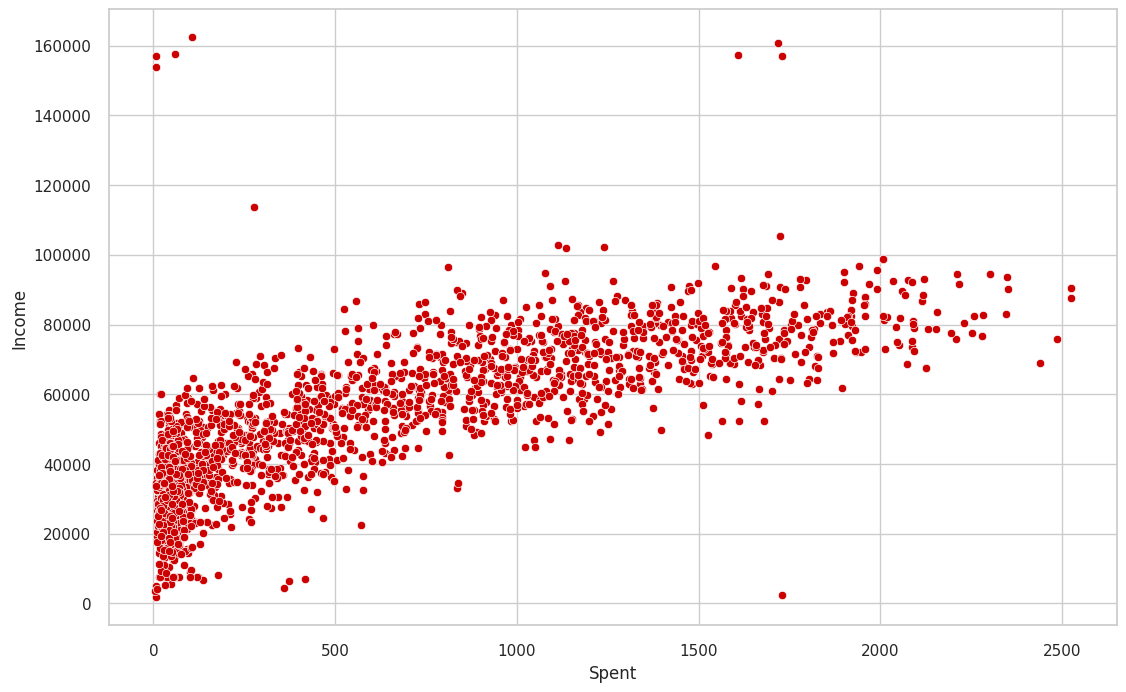

In [73]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=data[data['Income']<600000]['Spent'], y=data[data['Income']<600000]['Income'], color='#cc0000');

**Outlier Detection**

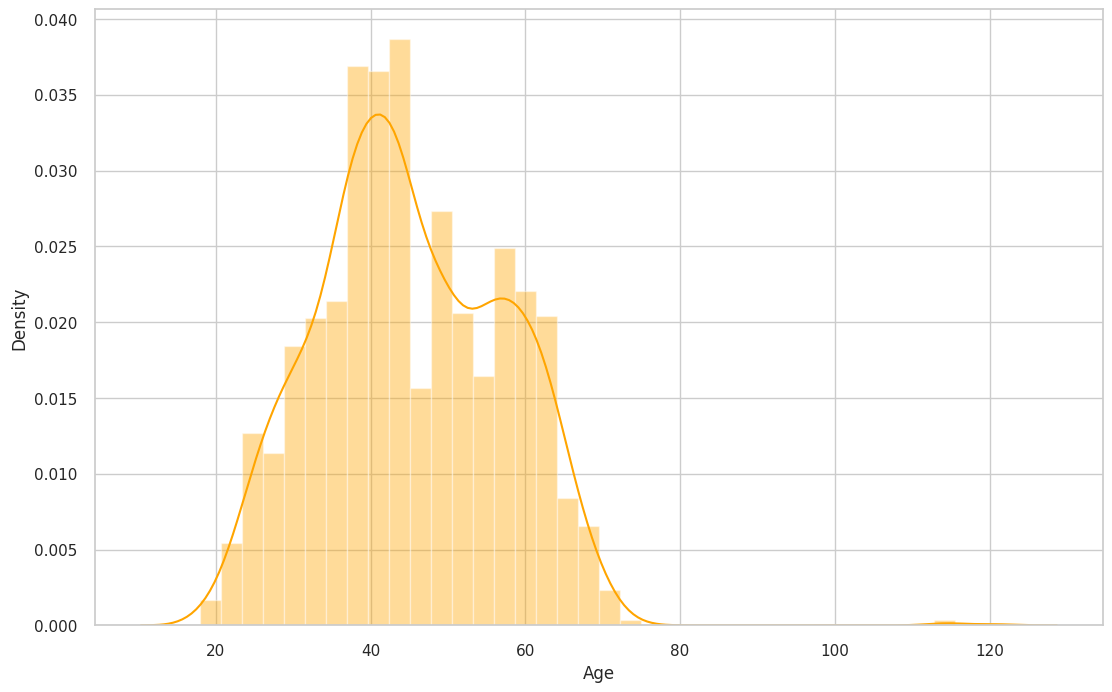

In [74]:
plt.figure(figsize=(13,8))
sns.distplot(data.Age, color='orange');

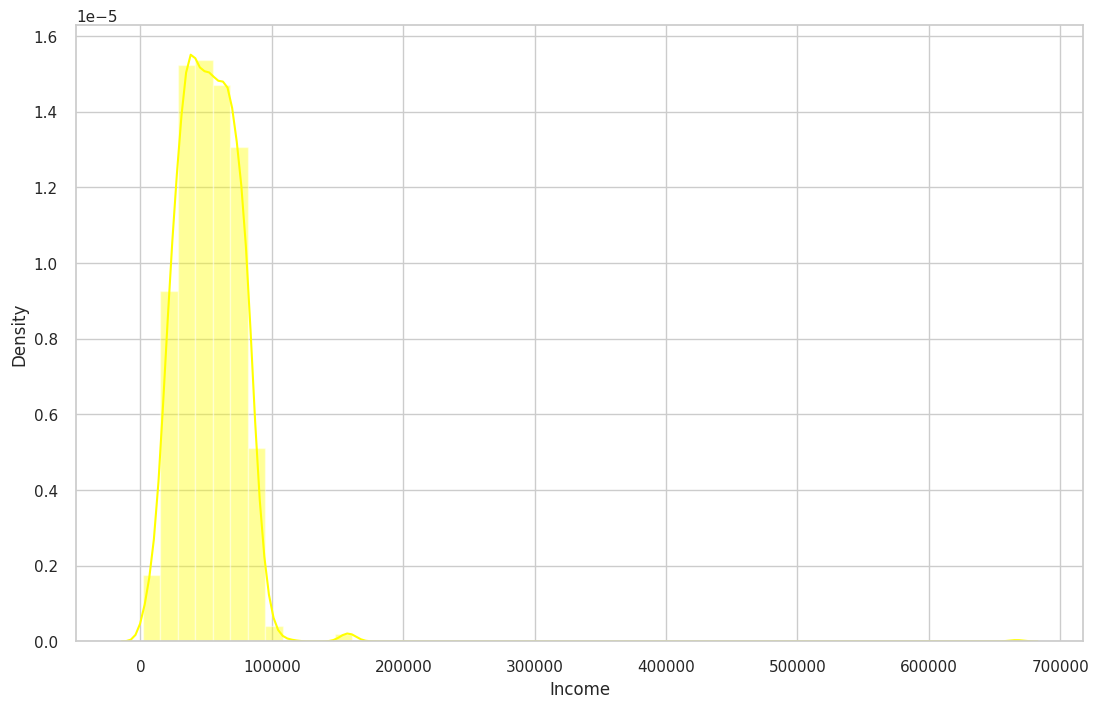

In [75]:
plt.figure(figsize=(13,8))
sns.distplot(data.Income, color='Yellow');

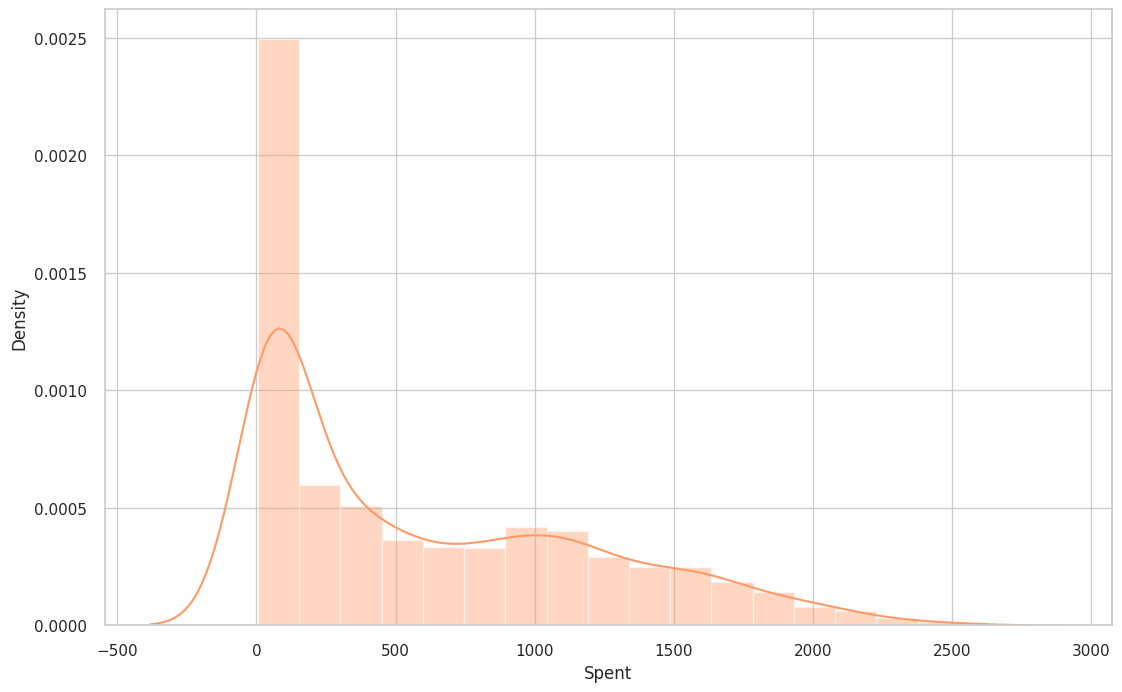

In [76]:
plt.figure(figsize=(13,8))
sns.distplot(data.Spent, color='#ff9966');

In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [78]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=data['Age'], notched=True, name='Age', marker_color = '#6699ff',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=data['Income'], notched=True, name='Income', marker_color = '#ff0066',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=data['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen',
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='Box Plots for Numerical Variables')

fig.show()


In [79]:
numerical = ['Income', 'Recency', 'Age', 'Spent']

In [80]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [81]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    114
239    121
339    115
Name: Age, dtype: int32 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [82]:
#We will delete some of the outlier points.
data = data[(data['Age']<100)]
data = data[(data['Income']<600000)]

In [83]:
data.shape

(2236, 40)

# Pre-Processing

  For the analysis of model building we will take required variables from the data set   
                    -- For the Standardization/Normalization we doesn't require categorical variables    
                    -- For Easy understanding we can change the categorical variables into numerical variables using labelencoders

In [84]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,381 days,1341,18,0,2013,June,Thursday,Middel Aged,1,Yes,Graduate
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,0,19 days,444,22,1,2014,June,Tuesday,Senior Citizen,3,Yes,Postgraduate
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,155 days,1241,19,1,2014,January,Saturday,Adult,0,No,Graduate
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,0,156 days,843,23,0,2014,January,Friday,Middel Aged,1,Yes,Postgraduate


In [85]:
#Taking required variables for analysis
ds=data[[ 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Spent', 'Total_acc_cmp', 'Children']]
ds

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Total_acc_cmp,Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1341,0,1
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,444,1,3
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,1241,1,0
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,843,0,1


Standardization

In [86]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
trans=StandardScaler()
std_data=pd.DataFrame(trans.fit_transform(ds))
std_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,2.386338,1.016868,1.680176,0.620456,-1.264308
1,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,-0.501987,1.395139
2,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-0.501987,-1.264308
3,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,-0.501987,0.065416
4,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,-0.501987,0.065416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,2.201960,3.900428,-0.168700,1.767433,0.115201,-0.552429,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,0.162216,1.221499,-0.501987,0.065416
2232,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,-0.691317,2.418490,1.407639,-0.226884,-0.244775,0.692865,-0.28041,-0.284104,-0.279482,3.811532,-0.116616,-0.095001,-0.419052,1.956986,-0.269201,0.620456,2.724862
2233,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,-0.365231,-0.383920,-0.686137,-0.751127,0.115201,2.216459,0.280722,-0.28041,3.519833,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,-1.034298,1.055312,0.620456,-1.264308
2234,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,0.070707,0.326936,-0.168700,0.688050,0.799373,1.293496,-0.955707,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,-0.095001,-0.419052,1.102333,0.393886,-0.501987,0.065416


In [87]:
minmax=MinMaxScaler()
minmax_data=pd.DataFrame(minmax.fit_transform(ds))
minmax_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.351086,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.696429,0.639683,0.2,0.000000
1,0.277680,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.008730,0.0,0.666667
2,0.434956,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.553571,0.305952,0.0,0.000000
3,0.155079,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.019048,0.0,0.333333
4,0.352051,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267857,0.165476,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,0.370288,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.133333,0.333333,0.107143,0.307692,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.517857,0.530159,0.0,0.333333
2232,0.387659,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.892857,0.174206,0.2,1.000000
2233,0.343885,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.066667,0.074074,0.107143,1.000000,0.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.267857,0.490476,0.2,0.000000
2234,0.420217,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.133333,0.222222,0.178571,0.769231,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.332540,0.0,0.333333


# PCA
   We use PCA for Dimension Reduction and to avoid multicollinearity between the variables

In [88]:
from sklearn.decomposition import PCA

In [89]:
#PCA on minmax
pca_min_max=PCA(random_state=10,n_components=0.95)
pca_airlines_min_max=pca_min_max.fit_transform(minmax_data)
print(pca_min_max.singular_values_)

[27.65756925 18.93239219 16.31260492 14.15528454 12.97796604 11.45557258
 11.18242786 10.01617628  9.30920736  8.33659684  7.9834337   6.85492243
  6.16027353  6.07159566  5.32300587  5.23971866]


In [90]:
np.round(np.cumsum(pca_min_max.explained_variance_ratio_*100),decimals=2)

array([29.21, 42.89, 53.05, 60.7 , 67.13, 72.15, 76.92, 80.75, 84.06,
       86.71, 89.15, 90.94, 92.39, 93.8 , 94.88, 95.93])

In [91]:
#PCA standard data
pca=PCA(n_components=0.95)
pca_values=pca.fit_transform(std_data)
pca_values

array([[ 4.31752202, -0.37291932, -0.18408562, ...,  0.36055197,
         1.37741826,  0.4968177 ],
       [-2.85827477, -0.115148  ,  0.54522992, ...,  0.20101165,
         0.12502569, -0.16990249],
       [ 1.74525414, -1.43534438, -0.7070373 , ..., -0.1922724 ,
        -0.83932458,  0.51800623],
       ...,
       [ 2.12803883,  0.6815233 , -0.33201459, ..., -1.04317726,
        -0.70705713,  0.2491306 ],
       [ 1.56693711, -1.68186771,  1.04119649, ...,  0.06142561,
        -0.2771678 ,  0.42112584],
       [-1.88825701,  1.40498282,  1.44635153, ..., -0.0214398 ,
        -0.39518357,  0.16203979]])

In [92]:
#Loading weights
#pca.components
#The amount of variance that each PCA explains is
var=pca.explained_variance_ratio_
var
#how much percent of variance of data present

array([0.31580016, 0.09981968, 0.08917234, 0.05472001, 0.04258059,
       0.04048044, 0.0384275 , 0.03810638, 0.03133948, 0.02949235,
       0.026608  , 0.02377948, 0.02340993, 0.02197967, 0.0201848 ,
       0.01777152, 0.01706046, 0.01641684, 0.01469467])

In [93]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([31.58, 41.56, 50.48, 55.95, 60.21, 64.26, 68.1 , 71.91, 75.04,
       77.99, 80.65, 83.03, 85.37, 87.57, 89.59, 91.37, 93.08, 94.72,
       96.19])

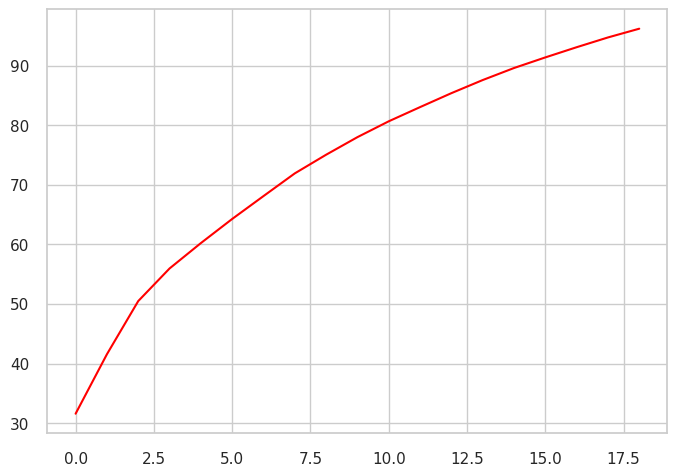

In [94]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")


we can see 90% of information has been from the first 15 columns, so we can take them for model building and ignore those remaining 10 columns which carries only 10% of information of dataset

In [95]:
pca_values[:,0:15]

array([[ 4.31752202, -0.37291932, -0.18408562, ..., -0.01124017,
        -0.01746717,  0.01251511],
       [-2.85827477, -0.115148  ,  0.54522992, ...,  0.25044729,
        -0.06557226,  0.46487047],
       [ 1.74525414, -1.43534438, -0.7070373 , ..., -0.40447593,
         0.69408995,  0.40449234],
       ...,
       [ 2.12803883,  0.6815233 , -0.33201459, ..., -1.25691744,
        -1.52164033,  0.53090982],
       [ 1.56693711, -1.68186771,  1.04119649, ..., -0.09840252,
         0.03041101,  0.22240033],
       [-1.88825701,  1.40498282,  1.44635153, ...,  0.70159727,
         0.08265237, -0.79611841]])

In [96]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:15],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']), data[['Education','Marital_Status','Year_Birth','ID','Dt_Customer']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,Education,Marital_Status,Year_Birth,ID,Dt_Customer
0,4.317522,-0.372919,-0.184086,2.047454,-0.073759,-0.486844,-0.111500,0.182917,-0.780482,-0.885517,3.079264,-0.620437,-0.011240,-0.017467,0.012515,Graduation,Single,1957-01-01,5524.0,2012-09-04
1,-2.858275,-0.115148,0.545230,-0.865722,-1.223968,1.050473,0.448198,-0.840554,0.278184,-0.172286,0.305671,0.033668,0.250447,-0.065572,0.464870,Graduation,Single,1954-01-01,2174.0,2014-03-08
2,1.745254,-1.435344,-0.707037,-0.192740,-0.402027,-1.520900,0.272148,0.473403,0.045960,-0.300156,-0.454258,-0.092964,-0.404476,0.694090,0.404492,Graduation,Together,1965-01-01,4141.0,2013-08-21
3,-2.692646,0.406261,-1.528492,0.289571,0.560776,-0.534384,0.793383,-0.190253,0.273656,0.312022,-0.411053,0.199234,-0.096189,0.046491,0.182308,Graduation,Together,1984-01-01,6182.0,2014-02-10
4,-0.614248,-0.725340,-0.267265,0.639286,2.097095,0.715631,-0.228650,-0.121781,-0.126098,0.479647,0.526646,-0.065749,-0.383611,0.174738,-0.278977,PhD,Married,1981-01-01,5324.0,2014-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-1.888257,1.404983,1.446352,0.417113,-1.341778,0.537738,0.709029,-0.693132,-0.422449,-0.356528,1.427885,-0.500988,0.701597,0.082652,-0.796118,Graduation,Married,1967-01-01,10870.0,2013-06-13
2236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhD,Together,1946-01-01,4001.0,2014-06-10
2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduation,Divorced,1981-01-01,7270.0,2014-01-25
2238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Master,Together,1956-01-01,8235.0,2014-01-24


In [97]:
finalDf.isnull().sum()

pc1               4
pc2               4
pc3               4
pc4               4
pc5               4
pc6               4
pc7               4
pc8               4
pc9               4
pc10              4
pc11              4
pc12              4
pc13              4
pc14              4
pc15              4
Education         4
Marital_Status    4
Year_Birth        4
ID                4
Dt_Customer       4
dtype: int64

In [98]:
finalDf=finalDf.dropna()

In [99]:
finalDf.isnull().sum()

pc1               0
pc2               0
pc3               0
pc4               0
pc5               0
pc6               0
pc7               0
pc8               0
pc9               0
pc10              0
pc11              0
pc12              0
pc13              0
pc14              0
pc15              0
Education         0
Marital_Status    0
Year_Birth        0
ID                0
Dt_Customer       0
dtype: int64

In [100]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Creating cluster with std data
n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hcluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkages)
        hcluster1 = hcluster.fit_predict(std_data)
        silhouette_score1 = silhouette_score(std_data, hcluster1)
        print("For n_clusters =", n_clusters, "The average silhouette score with linkage =", linkages, ':', silhouette_score1)
    print()


For n_clusters = 2 The average silhouette score with linkage = ward : 0.2658681489014447
For n_clusters = 2 The average silhouette score with linkage = complete : 0.5376096825459669
For n_clusters = 2 The average silhouette score with linkage = average : 0.5376096825459669
For n_clusters = 2 The average silhouette score with linkage = single : 0.47861432012911487

For n_clusters = 3 The average silhouette score with linkage = ward : 0.23905738550676678
For n_clusters = 3 The average silhouette score with linkage = complete : 0.49194945535215295
For n_clusters = 3 The average silhouette score with linkage = average : 0.49194945535215295
For n_clusters = 3 The average silhouette score with linkage = single : 0.4771398741296016

For n_clusters = 4 The average silhouette score with linkage = ward : 0.12548738890840455
For n_clusters = 4 The average silhouette score with linkage = complete : 0.47369787060956303
For n_clusters = 4 The average silhouette score with linkage = average : 0.47369

In [101]:
# creating cluster with minmax data

n_clusters=[2,3,4,5,6,7,8]
for n_clusters in n_clusters:
    for linkages in ["ward","complete","average","single"]:
        hcluster = AgglomerativeClustering(n_clusters=n_clusters, linkage = linkages)
        hcluster1=hcluster.fit_predict(minmax_data)
        silhouette_score1=silhouette_score(minmax_data,hcluster1)
        print("For n_clusters =",n_clusters,"The average silhouette score with linkage=",linkages,':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette score with linkage= ward : 0.23377182440486002
For n_clusters = 2 The average silhouette score with linkage= complete : 0.26750190919701944
For n_clusters = 2 The average silhouette score with linkage= average : 0.40224617227722975
For n_clusters = 2 The average silhouette score with linkage= single : 0.45017873448327883

For n_clusters = 3 The average silhouette score with linkage= ward : 0.2220047507421748
For n_clusters = 3 The average silhouette score with linkage= complete : 0.24298787510798653
For n_clusters = 3 The average silhouette score with linkage= average : 0.36709198897336826
For n_clusters = 3 The average silhouette score with linkage= single : 0.39459161613733723

For n_clusters = 4 The average silhouette score with linkage= ward : 0.1968433683153571
For n_clusters = 4 The average silhouette score with linkage= complete : 0.17621627105033022
For n_clusters = 4 The average silhouette score with linkage= average : 0.36484758235501

## we are going with standardized data with n_clusters = 2 The average silhouette score with linkage= average : 0.4080560070334789



**Feature Transformation**

In [102]:
# selecting the cols to use
subset = df1[['Income','Kidhome','Teenhome','Age','Partner','Education_Level']]
print('This is the data we will use for clustering:')
subset.head()

This is the data we will use for clustering:


,Income,Kidhome,Teenhome,Age,Partner,Education_Level
0,58138.0,0,0,57,No,Graduate
1,46344.0,1,1,60,No,Graduate
2,71613.0,0,0,49,Yes,Graduate
3,26646.0,1,0,30,Yes,Graduate
4,58293.0,1,0,33,Yes,Postgraduate


In [103]:
# examin the min, max and mean of your columns
subset.describe()

,Income,Kidhome,Teenhome,Age
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,51875.150461,0.444196,0.506250,45.147768
std,20936.079938,0.538398,0.544538,11.771725
min,1730.000000,0.000000,0.000000,18.000000
25%,35538.750000,0.000000,0.000000,37.000000
50%,51741.500000,0.000000,0.000000,44.000000
75%,68289.750000,1.000000,1.000000,55.000000
max,117416.250000,2.000000,2.000000,82.000000


**Make the pipelines**

Pipeline: A machine learning pipeline is a way to codify and automate the workflow it takes to produce a machine learning model. Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

Always try to build pipelines whenever you are going to deploy the model

In [104]:
# Importing essential libraries for bulding pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [105]:
# I am not scaling the kidhome, teenhome cols, cause thire min, max lies between 0 & 2
num_cols = ['Income','Age']
numeric_pipeline = make_pipeline(StandardScaler())

In [106]:
ord_cols = ['Education_Level']
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']]))

In [107]:
nom_cols = ['Partner']
nominal_pipeline = make_pipeline(OneHotEncoder())

In [108]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols),
                                              ('nominal' ,nominal_pipeline,nom_cols)
                                             ])

In [109]:
transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Income', 'Age']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Undergraduate',
                                                                              'Graduate',
                                                                              'Postgraduate']]))]),
                                 ['Education_Level']),
                                ('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Partner'])])

In [110]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(subset)
print('Data has been Transformed')

Data has been Transformed


# Hierarchical Clustering

In [123]:
agg_clustering=AgglomerativeClustering(n_clusters=2,linkage='average')
y_pred_hie=agg_clustering.fit_predict(std_data)
y_pred_hie

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
agg_clustering.n_connected_components_

1

In [125]:
(silhouette_score(std_data,agg_clustering.labels_)*100).round(3)

53.761

In [126]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


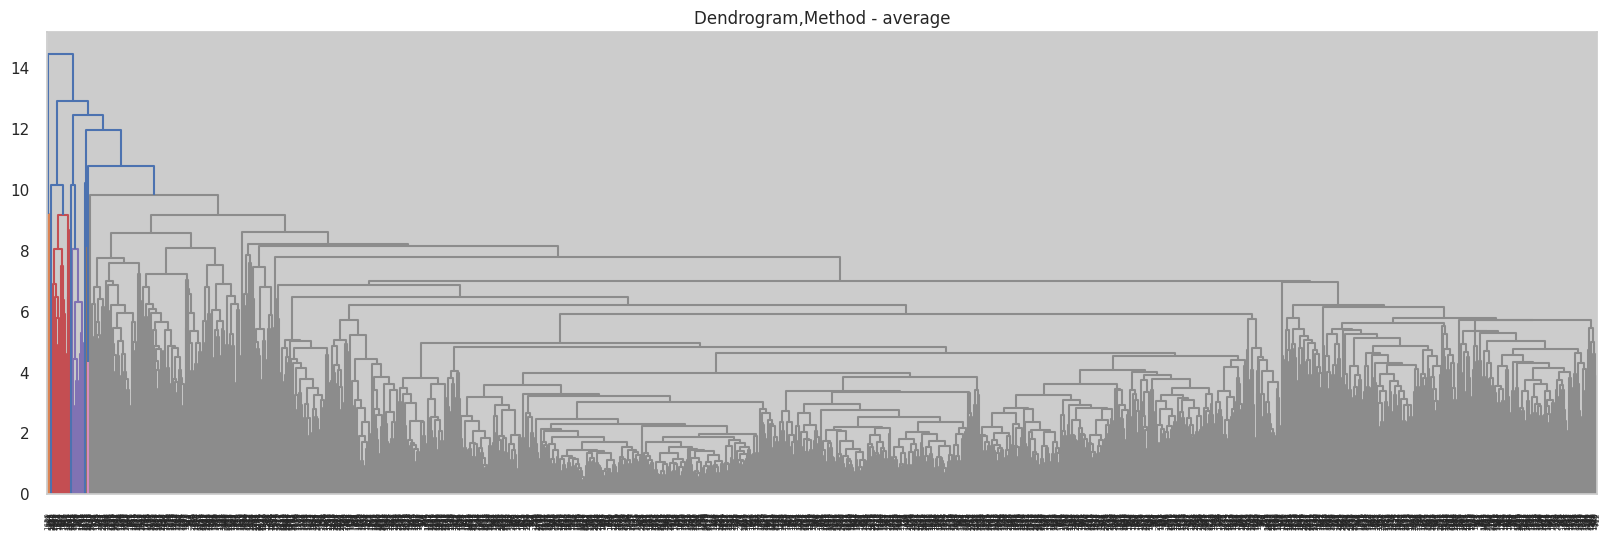

In [127]:
for method in ['average']:
  plt.figure(figsize=(20,6))
  plt.title("Dendrogram,Method - {}".format(method))
  Dendrogram2 = sch.dendrogram(sch.linkage(std_data,method=method,optimal_ordering=False))

In [128]:
#Adding cluster labels into the original dataset
data['Hie_Clustering']=agg_clustering.labels_
data.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0


In [129]:
#drop the 'Hie_Clustering' column
data.drop(['Hie_Clustering'],axis=1,inplace=True)

In [130]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate


In [131]:
data['Hie_Clustering'] = agg_clustering.labels_
data.head()
data['Hie_Clustering'].value_counts()


Hie_Clustering
0    2232
1       4
Name: count, dtype: int64

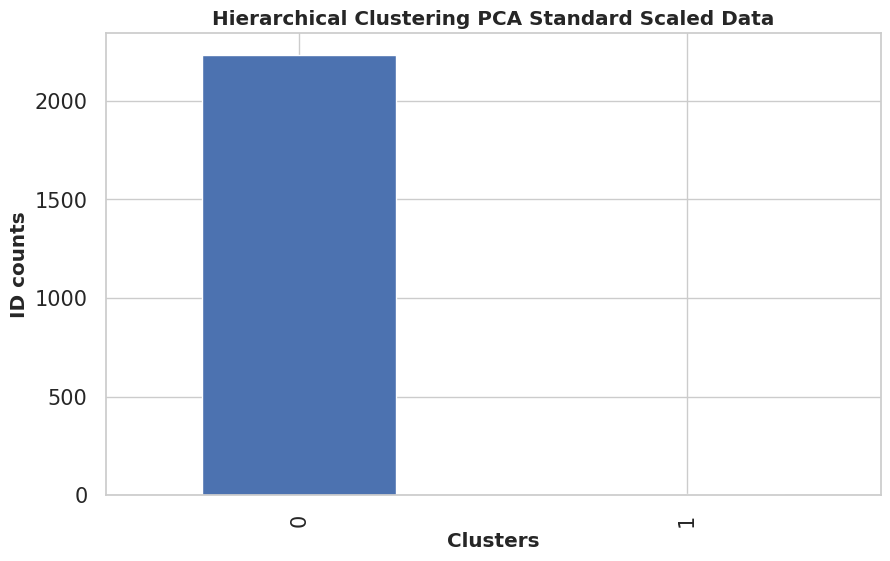

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['Hie_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [133]:
print('Values of Clusters: ', data['Hie_Clustering'].value_counts())

Values of Clusters:  Hie_Clustering
0    2232
1       4
Name: count, dtype: int64


In [256]:
data.groupby(['Hie_Clustering']).mean()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering,clust
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0,0


**K-MEANS CLUSTURING AND CLUSTER'S ANALYSIS**

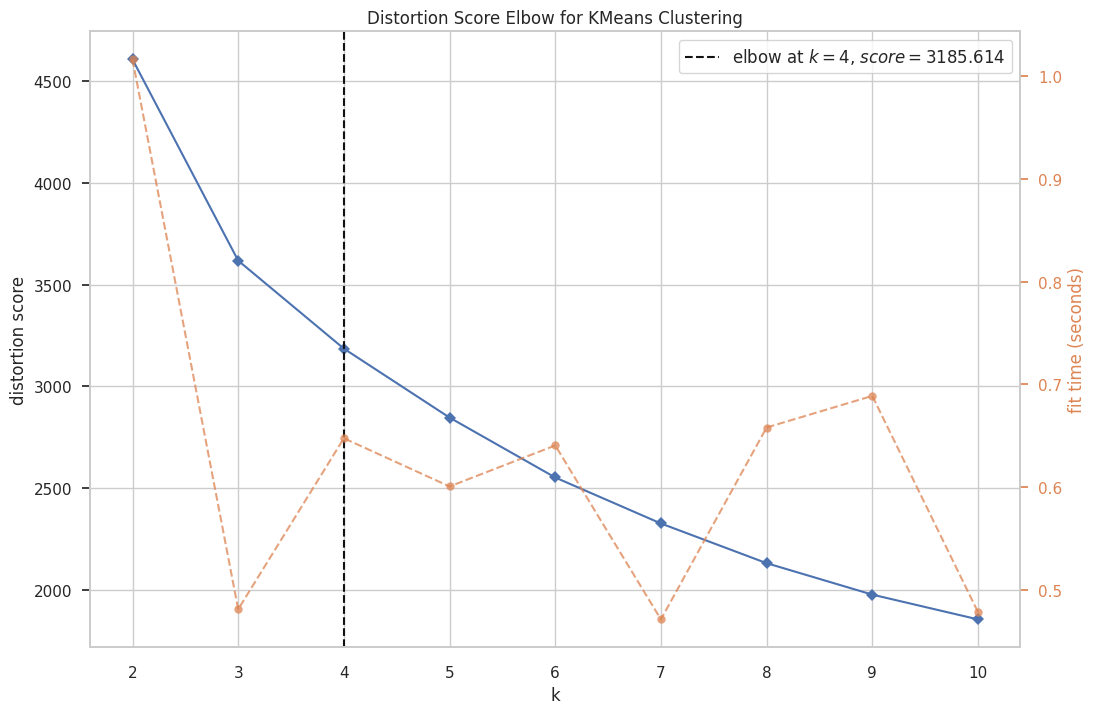

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [141]:
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(transformed)
elbow_graph.show()

We have created the 4 clustures K=4

In [142]:
# using k-means to form clusters
kmeans = KMeans(n_clusters=4, random_state=42)
subset['Clusters'] = kmeans.fit_predict(transformed) #fit the data and adding back clusters to the data in clusters column

In [143]:
subset.head()

,Income,Kidhome,Teenhome,Age,Partner,Education_Level,Clusters
0,58138.0,0,0,57,No,Graduate,2
1,46344.0,1,1,60,No,Graduate,2
2,71613.0,0,0,49,Yes,Graduate,1
3,26646.0,1,0,30,Yes,Graduate,0
4,58293.0,1,0,33,Yes,Postgraduate,1


In [144]:
subset.to_csv('example.csv', index=False)

## DBSCAN

For DBSCAN Clustering to know the efficient eps value we use K distance graph

In [145]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=70) # 2n(28*2)
nbrs = neigh.fit(std_data)
distances, indices = nbrs.kneighbors(std_data)

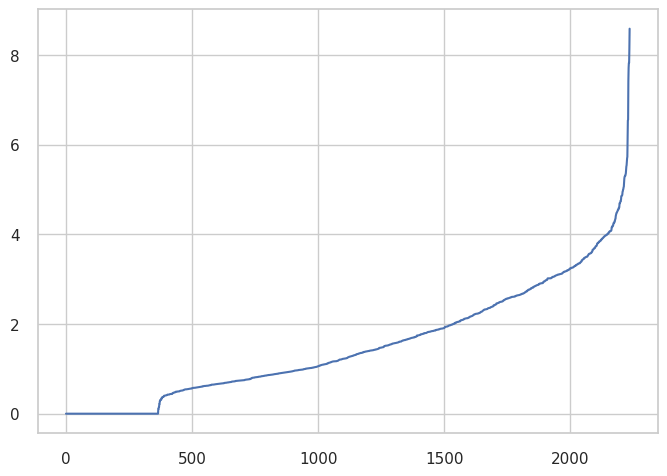

In [146]:
distances = np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In the K-distance graph, look for an "elbow" point, which is where the curve starts to level off.

From the K-Distance graph we can take eps value as 4.75 approximately

In [147]:
dbscan=DBSCAN(eps=4.75,min_samples=28) #d+1(29+1)
dbscan.fit(std_data)

DBSCAN(eps=4.75, min_samples=28)

In [148]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

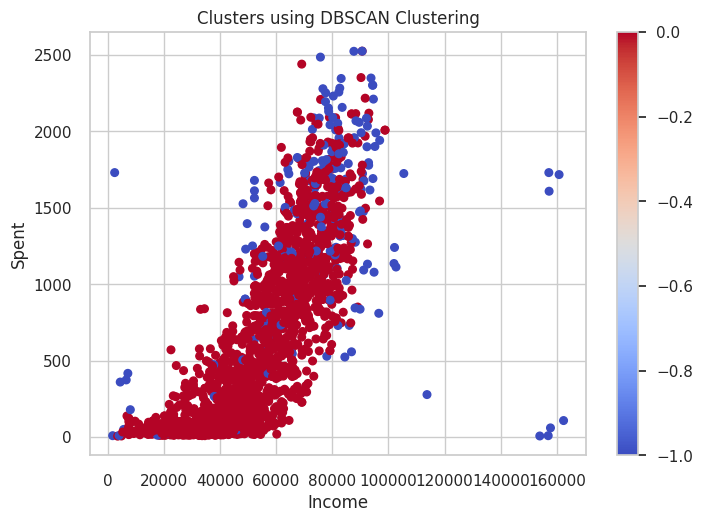

In [149]:
data.plot(x='Income',y='Spent',c=dbscan.labels_,kind='scatter',s=30,cmap=plt.cm.coolwarm)#plotting our model on scatter plot
plt.title("Clusters using DBSCAN Clustering")

In [150]:
data['clust']=dbscan.labels_

<Axes: xlabel='clust'>

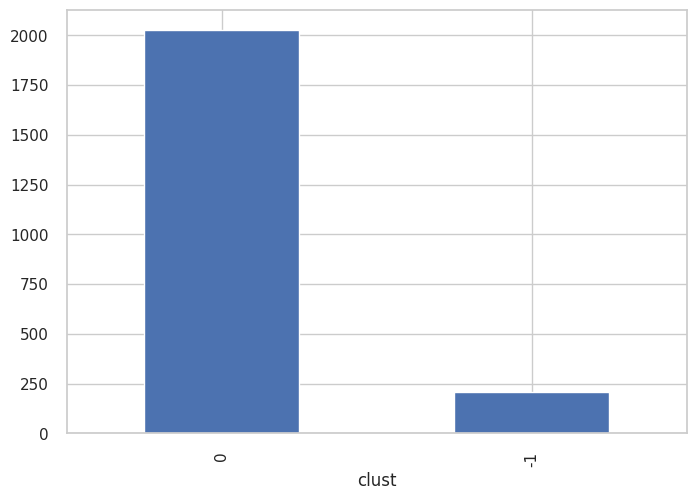

In [151]:
data['clust'].value_counts().plot(kind='bar')

In [152]:
data['clust'].unique()

array([ 0, -1])

In [153]:
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


Finding the silhoutte score

In [154]:
sc_1db4_75=silhouette_score(std_data,dbscan.labels_)#silhouette score
sc_1db4_75

0.391682065216413

Experimenting with different eps values and min_samples to see if there will be any increase in sillhouette score


In [155]:
dbscan1= DBSCAN(eps=5.50, min_samples=35) #d+1(29+1)
dbscan1.fit(std_data)

DBSCAN(eps=5.5, min_samples=35)

In [156]:
dbscan1.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

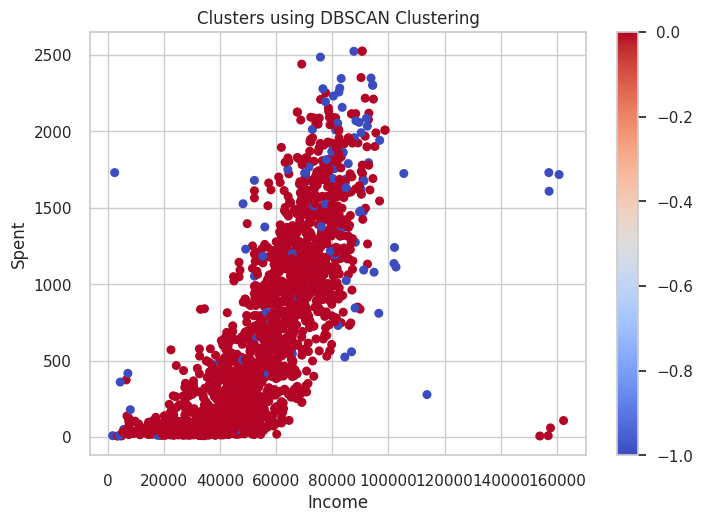

In [157]:
data.plot(x="Income",y ="Spent",c=dbscan1.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [158]:
data['clust'] = dbscan1.labels_
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering,clust
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,381 days,1341,18,0,2013,June,Thursday,Middel Aged,1,Yes,Graduate,0,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,0,19 days,444,22,1,2014,June,Tuesday,Senior Citizen,3,Yes,Postgraduate,0,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,155 days,1241,19,1,2014,January,Saturday,Adult,0,No,Graduate,0,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,0,156 days,843,23,0,2014,January,Friday,Middel Aged,1,Yes,Postgraduate,0,0


<Axes: xlabel='clust'>

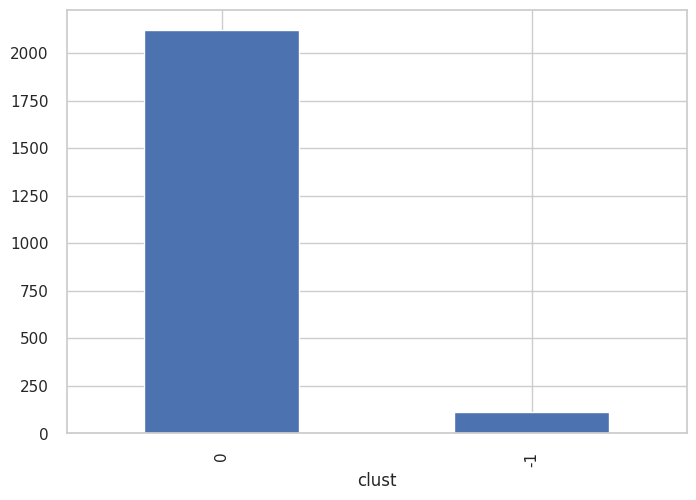

In [159]:
data['clust'].value_counts().plot(kind='bar')

In [160]:
sc_1db5_50=sklearn.metrics.silhouette_score(std_data,dbscan1.labels_)  #silhouette_score
sc_1db5_50

0.4474786099497854

In [161]:
dbscan2= DBSCAN(eps=6.0, min_samples=40) #eps=6
dbscan2.fit(std_data)

DBSCAN(eps=6.0, min_samples=40)

In [162]:
dbscan2.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

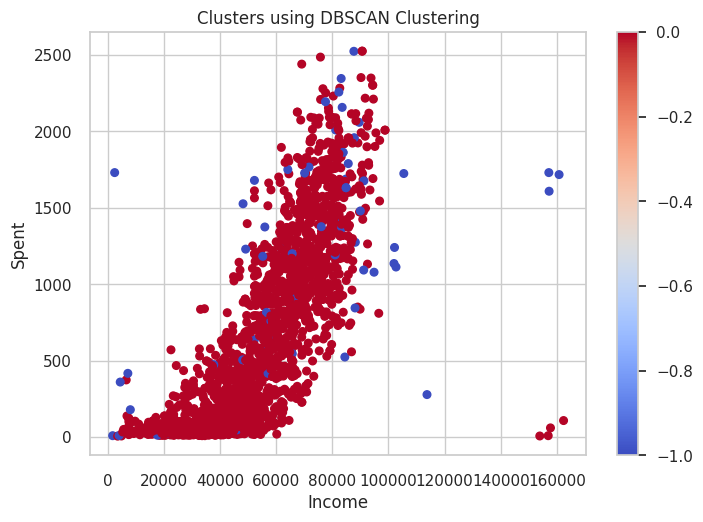

In [163]:
data.plot(x="Income",y ="Spent",c=dbscan2.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [164]:
data['clust'] = dbscan2.labels_
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering,clust
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,381 days,1341,18,0,2013,June,Thursday,Middel Aged,1,Yes,Graduate,0,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,0,19 days,444,22,1,2014,June,Tuesday,Senior Citizen,3,Yes,Postgraduate,0,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,155 days,1241,19,1,2014,January,Saturday,Adult,0,No,Graduate,0,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,0,156 days,843,23,0,2014,January,Friday,Middel Aged,1,Yes,Postgraduate,0,0


<Axes: xlabel='clust'>

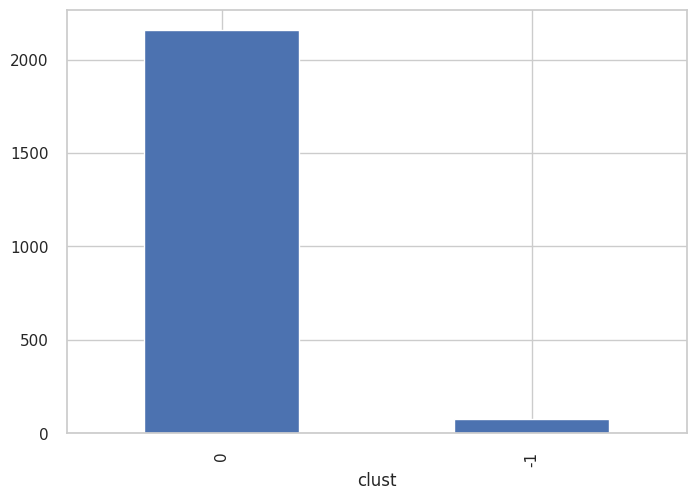

In [165]:
data['clust'].value_counts().plot(kind='bar')

In [166]:
sc_1db6=sklearn.metrics.silhouette_score(std_data,dbscan2.labels_)  #silhouette_score
sc_1db6

0.46917012409892545

In [167]:
dbscan3= DBSCAN(eps=7.0, min_samples=50) #eps=7
dbscan3.fit(std_data)

DBSCAN(eps=7.0, min_samples=50)

In [168]:
dbscan3.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

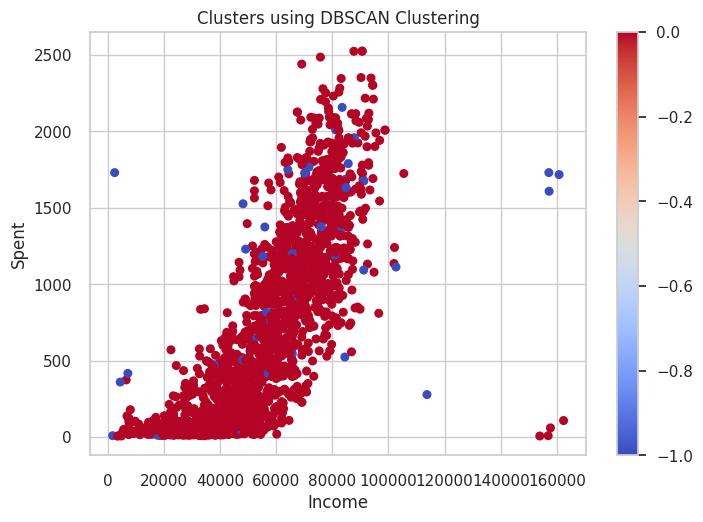

In [169]:
data.plot(x="Income",y ="Spent",c=dbscan3.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [170]:
data['clust'] = dbscan3.labels_
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering,clust
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,381 days,1341,18,0,2013,June,Thursday,Middel Aged,1,Yes,Graduate,0,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,0,19 days,444,22,1,2014,June,Tuesday,Senior Citizen,3,Yes,Postgraduate,0,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,155 days,1241,19,1,2014,January,Saturday,Adult,0,No,Graduate,0,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,0,156 days,843,23,0,2014,January,Friday,Middel Aged,1,Yes,Postgraduate,0,0


<Axes: xlabel='clust'>

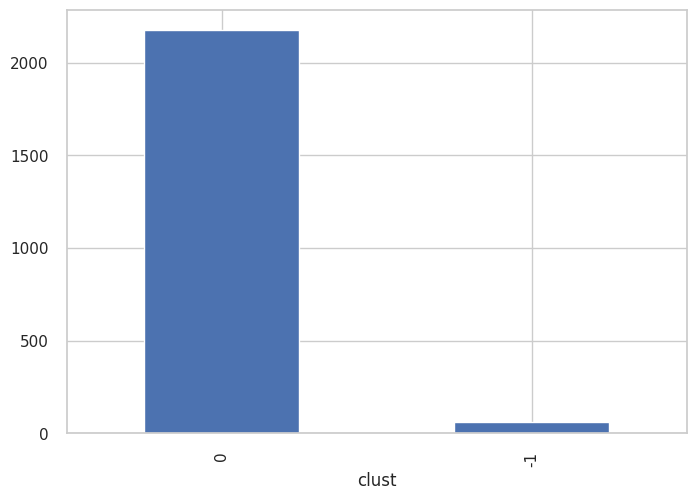

In [171]:
data['clust'].value_counts().plot(kind='bar')

In [172]:
sc_1db7=sklearn.metrics.silhouette_score(std_data,dbscan3.labels_)  #silhouette_score
sc_1db7

0.486709130560273

In [173]:
dbscan4 = DBSCAN(eps= 7.7, min_samples=55) # for eps = 7.7
dbscan4.fit(std_data)

DBSCAN(eps=7.7, min_samples=55)

In [174]:
dbscan4.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

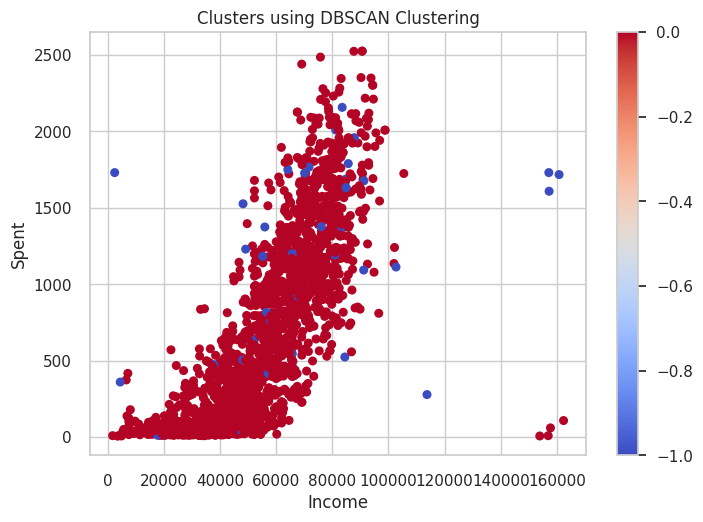

In [175]:
data.plot(x="Income",y ="Spent",c=dbscan4.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [176]:
data['clust'] = dbscan4.labels_
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering,clust
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,381 days,1341,18,0,2013,June,Thursday,Middel Aged,1,Yes,Graduate,0,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,0,19 days,444,22,1,2014,June,Tuesday,Senior Citizen,3,Yes,Postgraduate,0,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,155 days,1241,19,1,2014,January,Saturday,Adult,0,No,Graduate,0,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,0,156 days,843,23,0,2014,January,Friday,Middel Aged,1,Yes,Postgraduate,0,0


<Axes: xlabel='clust'>

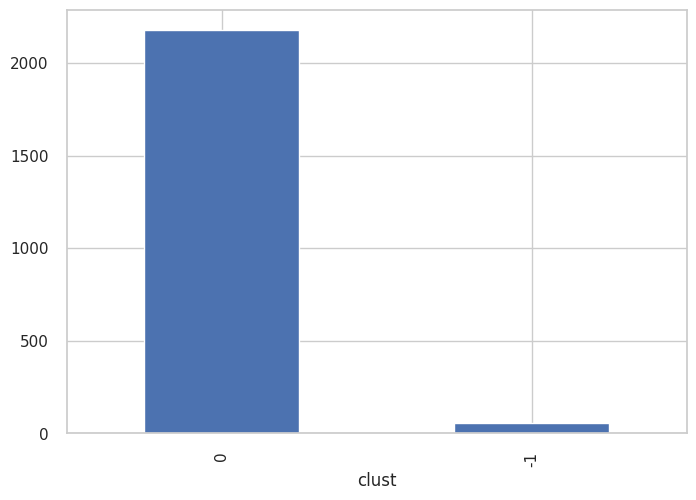

In [177]:
data['clust'].value_counts().plot(kind='bar')

In [178]:
sc_1db7=sklearn.metrics.silhouette_score(std_data,dbscan4.labels_)  #silhouette_score
sc_1db7

0.4893208611590688

In [179]:
dbscan5= DBSCAN(eps=8.0, min_samples=60) #eps 8.0
dbscan5.fit(std_data)

DBSCAN(eps=8.0, min_samples=60)

In [180]:
dbscan5.labels_

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Clusters using DBSCAN Clustering')

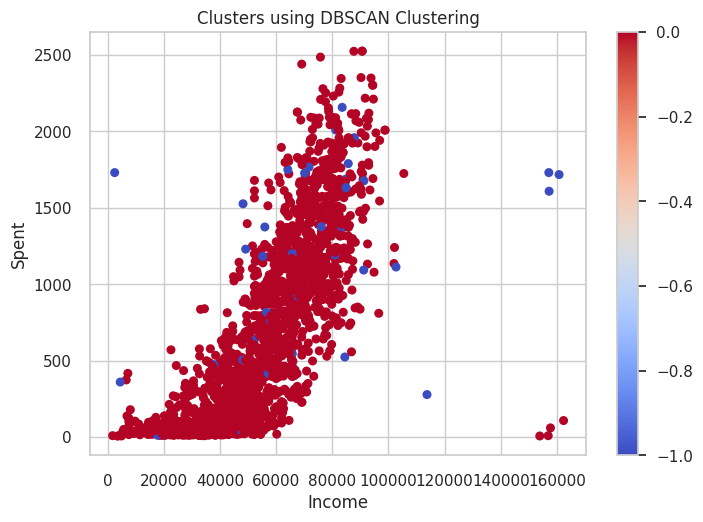

In [181]:
data.plot(x="Income",y ="Spent",c=dbscan5.labels_ ,kind = "scatter",s = 30,cmap=plt.cm.coolwarm)#plotting our build model on scatter plot
plt.title('Clusters using DBSCAN Clustering')

In [182]:
data['clust'] = dbscan5.labels_
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering,clust
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967-01-01,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,47,1,381 days,1341,18,0,2013,June,Thursday,Middel Aged,1,Yes,Graduate,0,0
2236,4001,1946-01-01,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,68,0,19 days,444,22,1,2014,June,Tuesday,Senior Citizen,3,Yes,Postgraduate,0,0
2237,7270,1981-01-01,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,33,0,155 days,1241,19,1,2014,January,Saturday,Adult,0,No,Graduate,0,0
2238,8235,1956-01-01,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,58,0,156 days,843,23,0,2014,January,Friday,Middel Aged,1,Yes,Postgraduate,0,0


<Axes: xlabel='clust'>

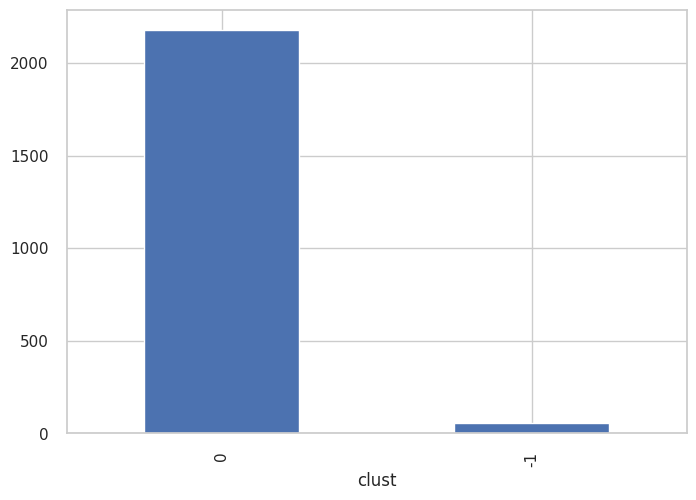

In [183]:
data['clust'].value_counts().plot(kind='bar')

In [184]:
sc_1db7=sklearn.metrics.silhouette_score(std_data,dbscan5.labels_)  #silhouette_score
sc_1db7

0.4893208611590688

We have run the 5 DBSCAN
The final silhoutte score is 0.4893208611590688
We have tried this for eps= 8 and min values= 60

### Splitting the data

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level,Hie_Clustering,clust
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate,0,0
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate,0,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate,0,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate,0,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate,0,0


In [187]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
model_data = data.drop(['Hie_Clustering','clust'],axis=1)
model_data['Education']= label_encoder.fit_transform(data['Education'])
model_data['Marital_Status']= label_encoder.fit_transform(data['Marital_Status'])
model_data.drop(['Dt_Customer'],axis=1, inplace=True)

In [188]:
model_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,Spent,TotalNumPurchases,Total_acc_cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
0,5524,1957-01-01,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,2,663 days,1617,25,1,2012,September,Tuesday,Middel Aged,0,No,Graduate
1,2174,1954-01-01,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,0,113 days,27,6,0,2014,March,Saturday,Middel Aged,2,No,Graduate
2,4141,1965-01-01,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,1,312 days,776,21,0,2013,August,Wednesday,Middel Aged,0,Yes,Graduate
3,6182,1984-01-01,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,0,139 days,53,8,0,2014,February,Monday,Adult,1,Yes,Graduate
4,5324,1981-01-01,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,0,161 days,422,19,0,2014,January,Sunday,Adult,1,Yes,Postgraduate


In [189]:
X = model_data.iloc[:,0:32]
Y = model_data.iloc[:,0:32]

In [190]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [191]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1788, 32) (448, 32) (1788, 32) (448, 32)


**Model Building - Clusters completed Upto here and Now working on this Model Building**

In [192]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [193]:
# separate features and target column
X = subset.drop('Clusters', axis=1)
Y = subset['Clusters']

In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [195]:
x_train.shape

(1792, 6)

In [196]:
X.shape

(2240, 6)

**1. KNN Classifier**

In [197]:
# Define a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [198]:
# Create a pipeline that includes data preprocessing and KNN classification
knn_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('scaler', StandardScaler()),  # Standardize your features (optional but recommended for KNN)
    ('classifier', knn_classifier)  # KNN classifier
])

In [199]:
# Fit the pipeline on the training data
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [200]:
# Make predictions on the test data
y_pred = knn_pipeline.predict(x_test)

In [201]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9642857142857143


**2.Decision Tree classifier**

In [202]:
# Define a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

In [203]:
# Create a pipeline that includes data preprocessing and the Decision Tree classifier
decision_tree_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('classifier', decision_tree_classifier)  # Decision Tree classifier
])

In [204]:
# Fit the pipeline on the training data
decision_tree_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [205]:
y_pred = decision_tree_pipeline.predict(x_test)

In [206]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9732142857142857


**3.AdaBoost**

In [207]:
# Define an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

In [208]:
# Create a pipeline that includes data preprocessing and the AdaBoost classifier
adaboost_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('classifier', adaboost_classifier)  # AdaBoost classifier
])

In [209]:
# Fit the pipeline on the training data
adaboost_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

In [210]:
# Make predictions on the test data
y_pred = adaboost_pipeline.predict(x_test)

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8214285714285714


**4.XGBoost**

In [212]:
pip install xgboost

In [213]:
xgboost_classifier = XGBClassifier(random_state=42)

In [214]:
xgboost_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('classifier', xgboost_classifier)  # XGBoost classifier
])

In [215]:
# Fit the pipeline on the training data
xgboost_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [216]:
# Make predictions on the test data
y_pred = xgboost_pipeline.predict(x_test)

In [217]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9776785714285714


**5.Gradient Boosting**

In [218]:
gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

In [219]:
gradient_boosting_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('classifier', gradient_boosting_classifier)  # Gradient Boosting classifier
])

In [220]:
gradient_boosting_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [221]:
y_pred = gradient_boosting_pipeline.predict(x_test)

In [222]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9776785714285714


**6.Support Vector Machines (SVM)**

In [223]:
# Define an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [224]:
# Create a pipeline that includes data preprocessing and the SVM classifier
svm_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('classifier', svm_classifier)  # SVM classifier
])

In [225]:
# Fit the pipeline on the training data
svm_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('classifier', SVC(kernel='linear', random_state=42))])

In [226]:
# Make predictions on the test data
y_pred = svm_pipeline.predict(x_test)

In [227]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9910714285714286


**7.Random Fores**

In [228]:
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [229]:
# Create a pipeline that includes data preprocessing and the Random Forest classifier
random_forest_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('classifier', random_forest_classifier)  # Random Forest classifier
])

In [230]:
# Fit the pipeline on the training data
random_forest_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('classifier', RandomForestClassifier())])

In [231]:
# Make predictions on the test data
y_pred = random_forest_pipeline.predict(x_test)

In [232]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.984375


**8.Logistric regression**

In [233]:
# Define a Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(random_state=42)

In [234]:
# Create a pipeline that includes data preprocessing and the Logistic Regression classifier
logistic_regression_pipeline = Pipeline([
    ('preprocessor', transformer),  # Apply your ColumnTransformer
    ('classifier', logistic_regression_classifier)  # Logistic Regression classifier
])

In [235]:
# Fit the pipeline on the training data
logistic_regression_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [236]:
# Make predictions on the test data
y_pred = logistic_regression_pipeline.predict(x_test)

In [237]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9910714285714286


In [238]:
data_score = {'accuracy_score' : [0.96428,0.97321,0.82142,0.97767,0.97767,0.99107,0.97991,0.99107]}

In [239]:
df = pd.DataFrame(data_score,index = ["model_KNN","model_DT","model_adaboost","model_xgboost","model_GNB","model_svm","model_RFC","model_LR"] )

In [240]:
df.sort_values(by=['accuracy_score'])

,accuracy_score
model_adaboost,0.82142
model_KNN,0.96428
model_DT,0.97321
model_xgboost,0.97767
model_GNB,0.97767
model_RFC,0.97991
model_svm,0.99107
model_LR,0.99107


## Model Validation

In [241]:
# Using K-fold validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [242]:
kfold_KNN = cross_val_score(knn_pipeline,X,Y, cv=5)
print("K-fold validation score of KNN is",kfold_KNN.mean())

K-fold validation score of KNN is 0.971875


In [243]:
kfold_adaboost = cross_val_score(adaboost_pipeline,X,Y, cv=5)
print("K-fold validation score of Adaboost is",kfold_adaboost.mean())

kfold_KNN = cross_val_score(knn_pipeline,X,Y, cv=5)
print("K-fold validation score of KNN is",kfold_KNN.mean())

kfold_DT = cross_val_score(decision_tree_pipeline,X,Y, cv=5)
print("K-fold validation score of Decision tree with criteria as entropy is",kfold_DT.mean())

kfold_xgboost = cross_val_score(xgboost_pipeline ,X,Y, cv=5)
print("K-fold validation score of xgboost is",kfold_xgboost.mean())

kfold_GNB = cross_val_score(gradient_boosting_pipeline,X,Y, cv=5)
print("K-fold validation score of Gaussian Naive bayes is",kfold_GNB.mean())

kfold_LR = cross_val_score(logistic_regression_pipeline,X,Y, cv=5)
print("K-fold validation score of Logistic Regression is",kfold_LR.mean())

kfold_RFC = cross_val_score(random_forest_pipeline,X,Y, cv=5)
print("K-fold validation score of Random Forest Classifier is",kfold_RFC.mean())

kfold_svm = cross_val_score(svm_pipeline,X,Y, cv=5)
print("K-fold validation score of SVM is",kfold_svm.mean())

K-fold validation score of Adaboost is 0.8263392857142857
K-fold validation score of KNN is 0.971875
K-fold validation score of Decision tree with criteria as entropy is 0.971875
K-fold validation score of xgboost is 0.9785714285714286
K-fold validation score of Gaussian Naive bayes is 0.9758928571428571
K-fold validation score of Logistic Regression is 0.9915178571428573
K-fold validation score of Random Forest Classifier is 0.9830357142857142
K-fold validation score of SVM is 0.9892857142857142


In [244]:
kfold_score = {"Kfold_score" :[0.82633,0.97187,0.97187,0.97857,0.97589,0.99151,0.98169,0.98928]}

In [245]:
df_score = pd.DataFrame(kfold_score,index = ["model_adaboost","model_KNN","model_DT","model_xgboost","model_GNB","model_LR","model_RFC","model_svm"])

In [246]:
df_score.sort_values(by='Kfold_score')

,Kfold_score
model_adaboost,0.82633
model_KNN,0.97187
model_DT,0.97187
model_GNB,0.97589
model_xgboost,0.97857
model_RFC,0.98169
model_svm,0.98928
model_LR,0.99151


**For Logistric regression we got Accuracy of 99%**

Making Final Pipeline for Model Deployment Logistric Regression with Accuracy of 99%


In [247]:
from sklearn.linear_model import LogisticRegression

In [248]:
# Create the Logistic Regression model
lr_model = LogisticRegression()

# Combine the transformer and the Logistic Regression model in a pipeline
final_pipeline = make_pipeline(transformer, lr_model)

In [249]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Age']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Undergraduate',
                                                                                               'Graduate',
                                                                                               'Postgraduate']]))]),
                                                  ['Education_Level']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Partner'])])),
                ('logisticregression', LogisticRegression())])

# **MODEL** **DEPLOYMENT**

In [250]:
import pickle

In [251]:
filename = 'classifier.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb'))

In [252]:
!pip install -q streamlit
!npm install -g localtunnel -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.9 MB/s eta 0:00:00
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.223s


In [253]:
%%writefile customer_segmentation_app.py
# importing necessary libraries
import pickle
import streamlit as st
import pandas as pd
import numpy as np

#load the model
classifier = pickle.load(open('/content/classifier.pkl','rb'))


#page configuration
st.set_page_config(page_title = 'Customer Segmentation Web App', layout='centered')
st.title('Customer Segmentation Web App')

# customer segmentation function
def segment_customers(input_data):

    prediction=classifier.predict(pd.DataFrame(input_data, columns=['Income','Kidhome','Teenhome','Age','Partner','Education_Level']))
    print(prediction)
    pred_1 = 0
    if prediction == 0:
            pred_1 = 'cluster 0'

    elif prediction == 1:
            pred_1 = 'cluster 1'

    elif prediction == 2:
            pred_1 = 'cluster 2'

    elif prediction == 3:
            pred_1 = 'cluster 3'

    return pred_1
def main():

    Income = st.text_input("Type In The Household Income")
    Kidhome = st.radio ( "Select Number Of Kids In Household", ('0', '1','2') )
    Teenhome = st.radio ( "Select Number Of Teens In Household", ('0', '1','2') )
    Age = st.slider ( "Select Age", 18, 85 )
    Partner = st.radio ( "Livig With Partner?", ('Yes', 'No') )
    Education_Level = st.radio ( "Select Education", ("Undergraduate", "Graduate", "Postgraduate") )

    result = ""

    # when 'Predict' is clicked, make the prediction and store it
    if st.button("Segment Customer"):
        result=segment_customers([[Income,Kidhome,Teenhome,Age,Partner,Education_Level]])

    st.success(result)


if __name__ == '__main__':
        main ()


Writing customer_segmentation_app.py


In [254]:
!wget -q -O - ipv4.icanhazip.com

146.148.80.30


In [255]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://146.148.80.30:8501

npx: installed 22 in 2.616s
your url is: https://little-badgers-swim.loca.lt
  Stopping...
^C
